In [1]:
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import blimpy
import seaborn as sns

melust = os.path.normpath('/lustre/aoc/students/jsofair/')
hits = os.path.join(melust, 'filterbank/hits/')

KeyboardInterrupt: 

Splitting hits_collation.json into chunks.

In [203]:
t0 = time.time()

hits_collation = pd.read_json(os.path.join(hits,'hits_collation.json'))

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 55.07888722419739


Get factors of 5697746 so it can be split into an even number of portions. This is not necessary by any means :)

In [93]:
N = 5697746 
for x in range (1,N+1):
    if N%x==0:
        print(x , end=' ')
        
# 98237 splits 5697746 into 58 parts

1 2 29 58 193 386 509 1018 5597 11194 14761 29522 98237 196474 2848873 5697746 

Splitting the dataframe into 58 equal chunks.

In [222]:
t0 = time.time()

#df.iloc[n] gives all of the information for the nth target (by index, not by counting number)
#df.iloc[n,m] gives the mth piece of information for the nth target (again, n and m are by index)

hits_segs = np.array_split(hits_collation, 58)

# hits_segs[n] gives the nth index chunk of hits_collation
# hits_segs[n] is a pandas dataframe

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 2.603440046310425


Splitting the dataframe into 58 equal chunks, all with names seg0, seg1, seg2, etc. This is merely for convenience.

In [98]:
t0 = time.time()
for i, seg in enumerate(hits_collation):
    exec(f'seg{i} = np.array_split(hits_collation, 58)[i]')

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 25.197849988937378


In [101]:
seg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98237 entries, 98237 to 196473
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file_path               98237 non-null  object 
 1   hit_file_enumeration    98237 non-null  int64  
 2   signal_frequency        98237 non-null  float64
 3   signal_index            98237 non-null  int64  
 4   signal_driftSteps       98237 non-null  int64  
 5   signal_driftRate        98237 non-null  float64
 6   signal_snr              98237 non-null  float64
 7   signal_coarseChannel    98237 non-null  int64  
 8   signal_numTimesteps     98237 non-null  int64  
 9   signal_power            98237 non-null  int64  
 10  signal_incoherentPower  98237 non-null  int64  
 11  sourceName              98237 non-null  object 
 12  fch1                    98237 non-null  float64
 13  foff                    98237 non-null  float64
 14  tstart                  98237 non

In [ ]:
plt.plot(seg1['signal_frequency'], seg1['signal_frequency'], '.')

<Axes: xlabel='signal_frequency', ylabel='signal_snr'>

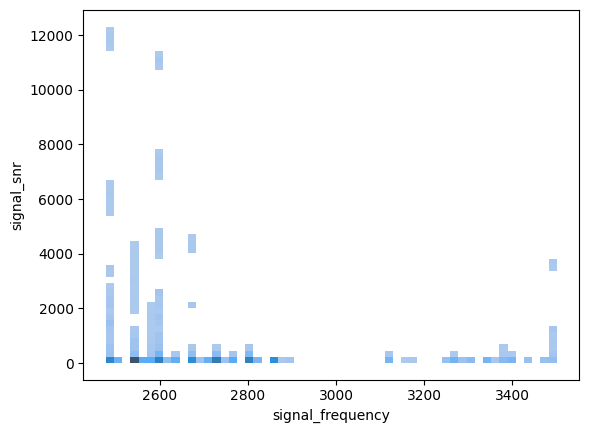

In [217]:
seg1_snr_sig = seg1.where(seg1['signal_snr'] > 10)

sns.histplot(x='signal_frequency', y='signal_snr', data=seg1_snr_sig, bins=55)

In [220]:
# Concatenating all of the segs...?

concat = pd.concat([seg1.assign(dataset='set1'), seg2.assign(dataset='set2')])

<Axes: xlabel='signal_frequency', ylabel='signal_snr'>

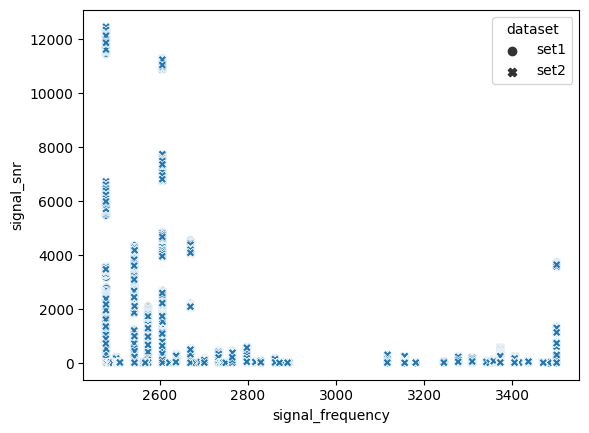

In [221]:
sns.scatterplot(x='signal_frequency', y='signal_snr', data=concat, style='dataset')

<Axes: xlabel='signal_frequency', ylabel='signal_power'>

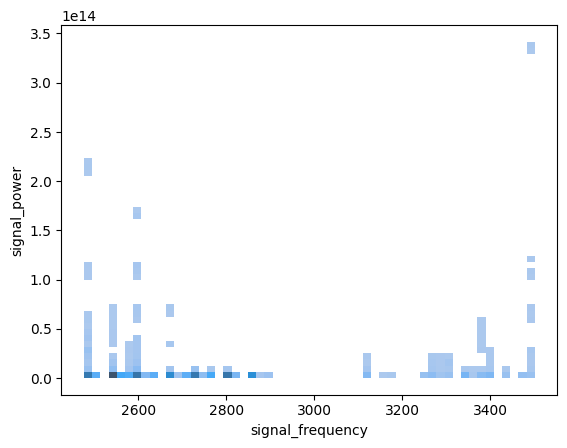

In [218]:
seg1_pow_sig = seg1.where(seg1['signal_power'] > 0)


sns.histplot(data=seg1, x='signal_frequency', y='signal_power', bins=55)

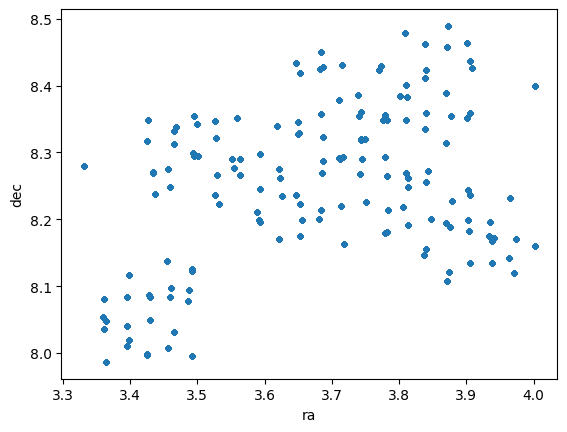

In [110]:
plt.xlabel("ra")
plt.ylabel('dec')
plt.plot(seg1['ra'],seg1['dec'], '.')

**Splitting up the original .json into 5 .jsons.** A comparison of 2 methods:
1. Reading it in as a pandas dataframe and splitting up the dataframe with np.array_split()
2. Converting it to a .csv\
    a. Splitting the .csv into smaller .csvs (this step done in terminal) 
---
It appears that method 1 is MUCH faster! This is what I will be using. I will copy and paste the necessary cells above this.

**Method 1: Reading in pandas dataframe and splitting the dataframe using np.array_split()**

In [91]:
t0 = time.time()

hits_collation = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation.json'))

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 54.46286916732788


Get factors of 5697746 so it can be split into an even number of portions.

In [83]:
N = 5697746 
for x in range (1,N+1):
    if N%x==0:
        print(x , end=' ')
        
# 98237 splits 5697746 into 58 parts

1 2 29 58 193 386 509 1018 5597 11194 14761 29522 98237 196474 2848873 5697746 

Splitting the dataframe into 58 equal chunks.

In [84]:
t0 = time.time()

#df.iloc[0] gives all of the information for the 1st (0th index) target
#df.iloc[0,1] gives the 2nd (1st index) piece of information for the 1st (0th index) target

hits_segs = np.array_split(hits_collation, 58)

# hits_segs[n] gives the nth index chunk of hits_collation
# hits_segs[n] is a pandas dataframe

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 1.72257399559021


Splitting the dataframe into 58 equal chunks, all with names seg0, seg1, seg2, etc. This is merely for convenience.

In [85]:
t0 = time.time()
for i, seg in enumerate(hits_collation):
    exec(f'seg{i} = np.array_split(hits_collation, 58)[i]')

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 23.44322943687439


**Method 2: Converting to .csv and splitting this into smaller .csvs**

Convert to .csv

In [86]:
t0 = time.time()

hits_collation.to_csv(path_or_buf=os.path.join(melust,'filterbank/hits_collation.csv'))

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 118.16067266464233


Read in .csvs

In [15]:
t0 = time.time()

seg_list_none = glob.glob(os.path.join(melust, 'filterbank/hits/hits_collation_seg_*'))
seg_list_csv = []

for i, seg in enumerate(seg_list_none):
    exec(f'seg_{i+1} = pd.read_csv(seg_list_none[i])')
    exec(f'seg_list_csv.append(seg_{i+1})')
    
t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 26.937621355056763


Convert .csvs to .jsons (*not necessary anymore!*)

In [90]:
# t0 = time.time()

# seg_list_json = []

# for i, seg in enumerate(seg_list_csv):
#     exec(f'seg_{i+1}.to_json(path_or_buf=os.path.join(melust,"filterbank/hits/hits_collation_seg{i+1}.json"))')
#     exec(f'seg_list_json.append(seg_{i+1})')
    
# # print(type(seg_1),len(seg_list_json))
# t1 = time.time()
# print(f'Elapsed time: {t1 - t0}')

# t0 = time.time()

# for i, seg in enumerate(seg_list_json):
    
# #     seg_n.read_json(path)
#     exec(f'seg_{i+1}.read_json(os.path.join(melust,"filterbank/hits/hits_collation_seg1.json"))')
# #     exec(f'seg_list_json.append(seg_{i+1})')
         
# t1 = time.time()
# print(f'Elapsed time: {t1 - t0}')


# seg1_csv.to_json(path_or_buf=os.path.join(melust,'filterbank/hits/hits_collation_seg1.json'))
# seg2_csv.to_json(path_or_buf=os.path.join(melust,'filterbank/hits/hits_collation_seg2.json'))
# seg3_csv.to_json(path_or_buf=os.path.join(melust,'filterbank/hits/hits_collation_seg3.json'))
# seg4_csv.to_json(path_or_buf=os.path.join(melust,'filterbank/hits/hits_collation_seg4.json'))
# seg5_csv.to_json(path_or_buf=os.path.join(melust,'filterbank/hits/hits_collation_seg5.json'))


# seg1 = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation_seg1.json'))
# seg2 = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation_seg2.json'))
# seg3 = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation_seg3.json'))
# seg4 = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation_seg4.json'))
# seg5 = pd.read_json(os.path.join(melust,'filterbank/hits/hits_collation_seg5.json'))

In [ ]:
seg1.info()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697746 entries, 0 to 5697745
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   file_path               object 
 1   hit_file_enumeration    int64  
 2   signal_frequency        float64
 3   signal_index            int64  
 4   signal_driftSteps       int64  
 5   signal_driftRate        float64
 6   signal_snr              float64
 7   signal_coarseChannel    int64  
 8   signal_numTimesteps     int64  
 9   signal_power            int64  
 10  signal_incoherentPower  int64  
 11  sourceName              object 
 12  fch1                    float64
 13  foff                    float64
 14  tstart                  float64
 15  tsamp                   float64
 16  ra                      float64
 17  dec                     float64
 18  telescopeId             int64  
 19  numTimesteps            int64  
 20  numChannels             int64  
 21  coarseChannel           int64  

In [18]:
df.columns

Index(['file_path', 'hit_file_enumeration', 'signal_frequency', 'signal_index',
       'signal_driftSteps', 'signal_driftRate', 'signal_snr',
       'signal_coarseChannel', 'signal_numTimesteps', 'signal_power',
       'signal_incoherentPower', 'sourceName', 'fch1', 'foff', 'tstart',
       'tsamp', 'ra', 'dec', 'telescopeId', 'numTimesteps', 'numChannels',
       'coarseChannel', 'startChannel', 'beam'],
      dtype='object')

In [20]:
df['signal_snr']

0            9.934638
1           30.248476
2           10.520581
3          131.106888
4          113.227287
              ...    
5697741     89.246376
5697742     48.087265
5697743     13.065119
5697744     18.228556
5697745     17.409325
Name: signal_snr, Length: 5697746, dtype: float64

In [ ]:
df.hist(column='signal_frequency')

In [7]:
hits = []

print(df['signal_snr'][0:5])

# for i in df['signal_snr']:
#     if i > 20:
#         hits.append(i)


print(hits)

0      9.934638
1     30.248476
2     10.520581
3    131.106888
4    113.227287
Name: signal_snr, dtype: float64
[]


In [ ]:
plt.plot(df['signal_frequency'], hits, '.')

In [ ]:
plt.xlabel("ra")
plt.ylabel('dec')
plt.plot(df['ra'],df['dec'], '.')

In [ ]:
# plt.scatter(x=df['signal_frequency'],y=df['signal_power'], c=df['beam'], cmap="summer")
# plt.colorbar()
# plt.show()
# cmap = mpl.cm.viridis
# bounds = [0,1,2,3,4]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size = '5%', pad = 0.1)

# (x=, c=df['beam'],cmap=cm)

# plt.xlabel("Frequency (MHz)")
# plt.ylabel("Power (counts)")

# data = (df['signal_frequency'],df['signal_power'])

ax.plot(df['signal_frequency'], df['signal_power'], '.')

# fig.colorbar(im, cax=cax, orientation='vertical', label = 'beam')

# fig.colorbar(im, mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='vertical',label='beam')

# ax.set(xlabel = 'Frequency (MHz)', ylabel = 'Power (counts)')

plt.tight_layout()
plt.show()

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, cmap=cm)
plt.colorbar(sc)
plt.show()